In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

cifar10 = tf.keras.datasets.cifar10

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


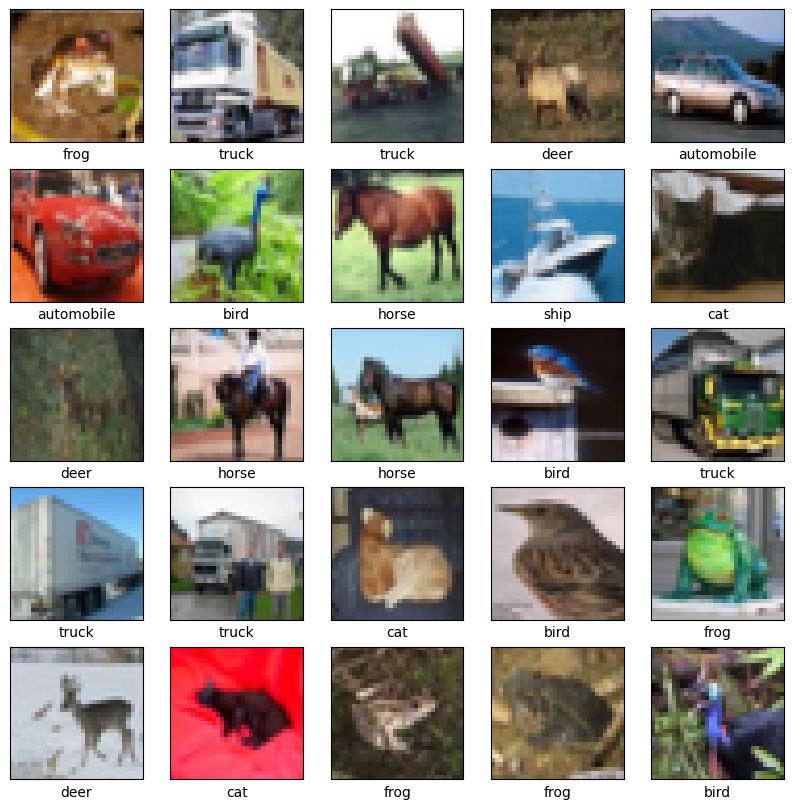

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# Label and plot images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [3]:
# Code taken from https://www.kaggle.com/code/yorkyong/exploring-cifar-10-w-mlp-cnn-resnet
# please dont use in final project
import numpy as np

# Standardize data (?)
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_standardized = (x_train - x_train_mean) / x_train_std

x_test_standardized = (x_test - x_train_mean) / x_train_std

# Flatten the images
#x_train_flat = x_train_standardized.reshape(x_train_standardized.shape[0], -1)
#x_test_flat = x_test_standardized.reshape(x_test_standardized.shape[0], -1)


In [14]:
# Code taken from https://www.kaggle.com/code/yorkyong/exploring-cifar-10-w-mlp-cnn-resnet
# * Don't use in final project, just for testing

# Create the model architecture
model1 = tf.keras.models.Sequential(name="MLP_model")

# add layers
model1.add(tf.keras.layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(32, 32, 3))) # 3072 = 32 x 32 x 3 (Image resolution * color channels)
model1.add(tf.keras.layers.MaxPooling2D((2, 2))) # hidden layer
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='gelu')) # hidden layer
model1.add(tf.keras.layers.MaxPooling2D((2, 2))) # hidden layer
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='gelu')) # hidden layer

#model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dense(10))

# add down here the convulutional network model

In [15]:
# yes this code is stolen again
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
#model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1.summary()



Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# more stolen code
# training the model

history = model1.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.3778 - loss: 1.7113 - val_accuracy: 0.5790 - val_loss: 1.1844
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6006 - loss: 1.1266 - val_accuracy: 0.6479 - val_loss: 0.9961
Epoch 3/10
 909/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6780 - loss: 0.9177

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


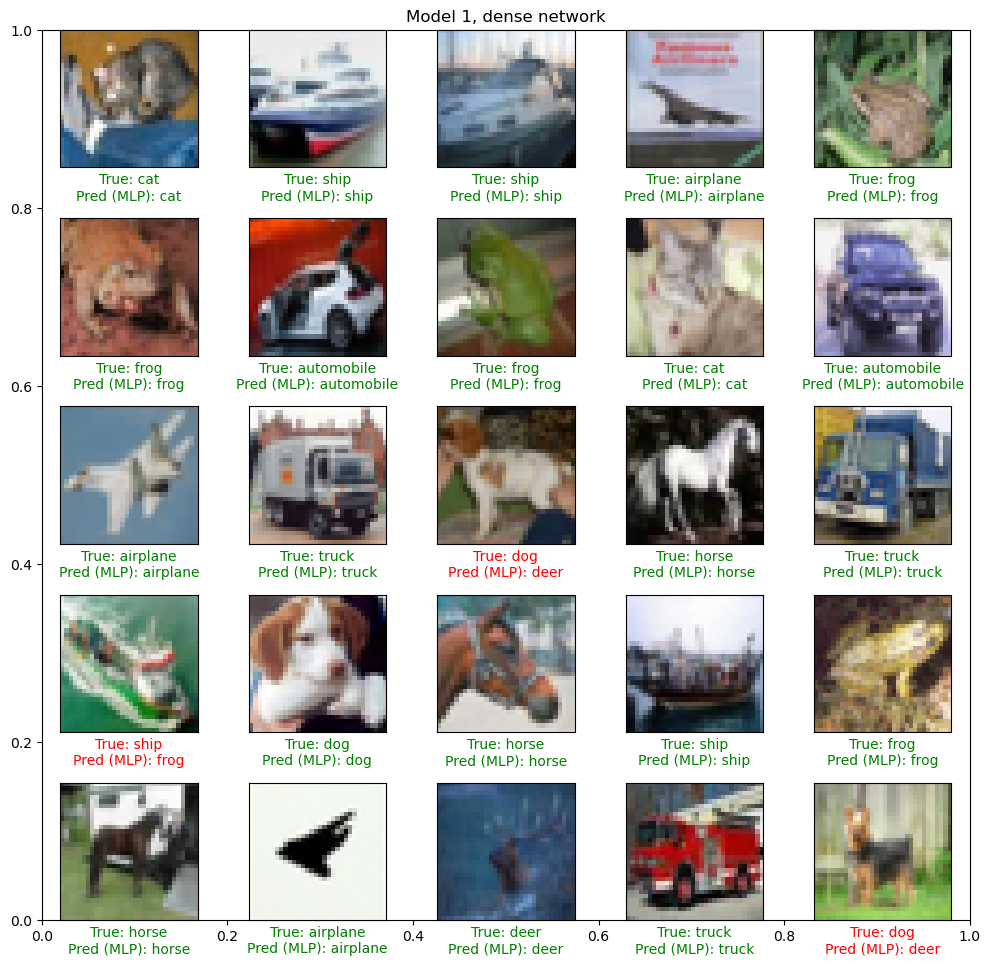

In [13]:
# * don't use in final project
# checking the accuracy

# Get predictions for the test set
predictions_mlp = model1.predict(x_test)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
plt.title("Model 1, dense network")
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]  # Get predicted label
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

In [ ]:
# notice the normal dense network really only gets so good, probably should use something else (or just use more epochs)